# Tutorial: Single Criticality Measure
This tutorial demonstrates how to use CommonRoad-CriMe with signal criticality measure. Please make sure that you have correctly installed the package and have gone through the tutorials for CommonRoad Input-Output beforehand.

## Import and Building Configuration
Computing the criticality requires a configuration that hold essential parameters of the measure. The configuration is often built from default parameters (located in `./config_files/defaults/`) and scenario-specific parameters. If you wish to overwrite a parameter for a specific scenario, simply create a .yaml file with the name of the scenario under `./config_files/` and store the parameter in it.

In [2]:
from commonroad_crime.data_structure.configuration_builder import ConfigurationBuilder
from commonroad_crime.data_structure.crime_interface import CriMeInterface
from commonroad_crime.measure import TTCStar

# ==== specify scenario
scenario_id = "ZAM_Zip-1_56_T-1"

# ==== build configuration
config = ConfigurationBuilder.build_configuration(scenario_id)
config.update()
config.print_configuration_summary()

# ===== Configuration Summary ===== #
# Scene/Scenario: ZAM_Zip-1_56_T-1
# ego vehicle: id 2
# ================================= #


/home/ziqianxu/anaconda3/envs/commonroad-py37/lib/python3.7/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


## Compute the criticality

In this tutorial, we should the evaluation of the `time-to-collision` with given predication, which we call `TTCStar`. The set-based prediction of other traffic participants is given.

In [3]:
evaluator = TTCStar(config)
time_step = 0
other_veh_id = 99
evaluator.compute(time_step, other_veh_id)

* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = inf


inf

## Visualization of the evaluation result

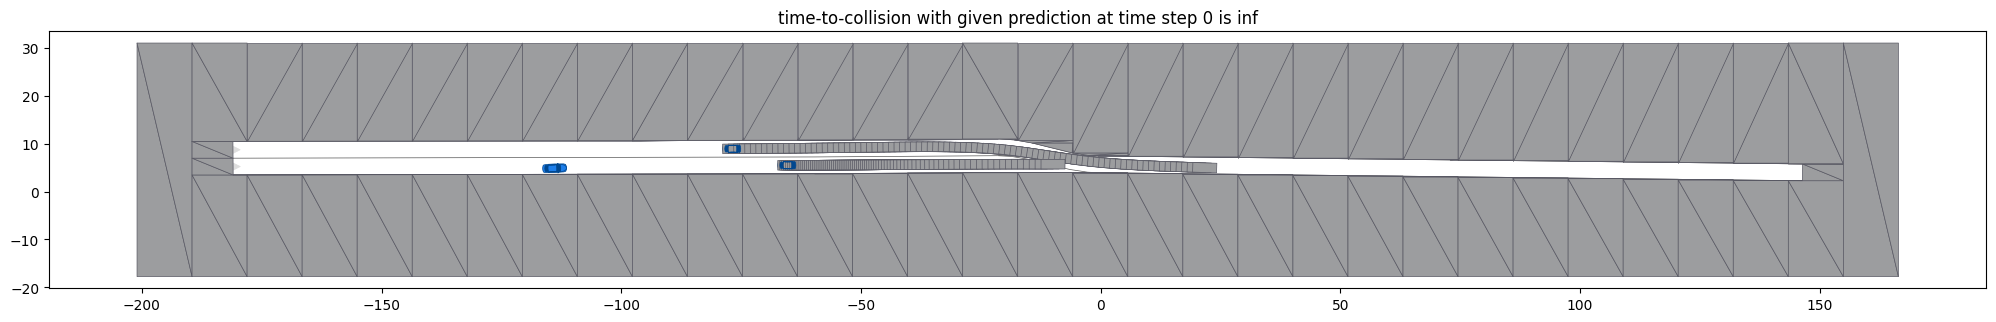

In [4]:
config.debug.save_plots = False
evaluator.visualize()

## Evasive maneuver to avoid the collision?
The TTC and its variants do not provide enough information for collision avoidance, as they do not include possible evasive maneuvers. To address this limitation, the time-to-react (TTR)
is proposed as the latest possible time before the TTC, at which an evasive maneuver still exists.

* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = 2.25
* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = 2.25
*		 time-to-brake = 1.25
* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = 2.25
*		 time-to-kickdown = -inf
* Computing the time-to-steer at time step 0
* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = 2.25
*		 time-to-maneuver = -inf
* Computing the time-to-collision with given prediction at time step 0
*		 time-to-collision with given prediction = 2.25
*		 time-to-maneuver = -inf
*		 time-to-steer = -inf
*	 maximum of the values
*		 time-to-react = 1.25


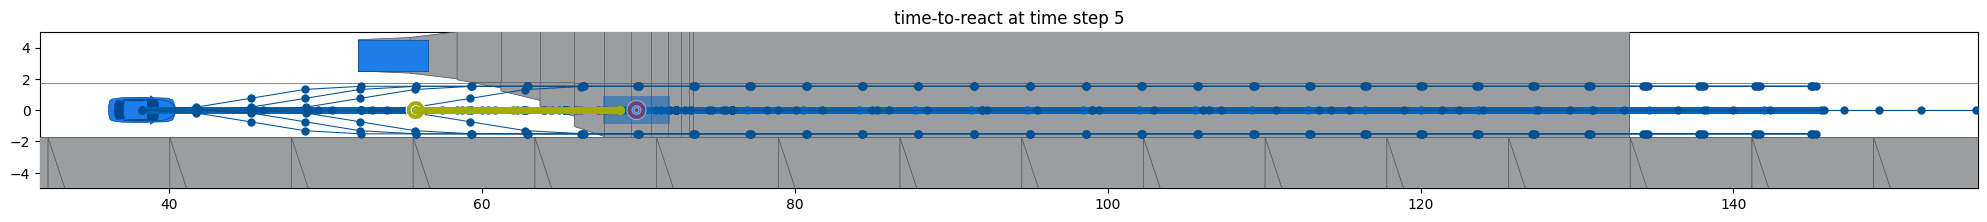

In [5]:
from commonroad_crime.measure import TTR

evaluator = TTR(config)
evaluator.compute(time_step, other_veh_id)
evaluator.visualize()